# Predicting Heart Disease Using Clinical Data


# 1. Exploratory Data Analysis

In [104]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
from google.colab import files
files.upload()

Saving heart.csv to heart.csv


{'heart.csv': b'\xef\xbb\xbfage,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42,1,0,140,226,

In [105]:
heart_disease = pd.read_csv("heart.csv")

In [106]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [108]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [109]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#  Data pre-processing

# Drop faulty data

In [110]:
# Filter Faulty Data Based on Conditions
# Remove rows where ca=4 and thal=0 (faulty values based on documentation)
cleaned_data = heart_disease[(heart_disease['ca'] < 4) & (heart_disease['thal'] > 0)]

#  Reset the Index After Filtering
cleaned_data = cleaned_data.reset_index(drop=True)

# Verify the Cleaned Data
print(f'The length of the data now is {len(cleaned_data)} instead of {len(heart_disease)}!')
print("Updated Dataset Info After Cleaning:")
print(cleaned_data.info())

The length of the data now is 296 instead of 303!
Updated Dataset Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       296 non-null    int64  
 1   sex       296 non-null    int64  
 2   cp        296 non-null    int64  
 3   trestbps  296 non-null    int64  
 4   chol      296 non-null    int64  
 5   fbs       296 non-null    int64  
 6   restecg   296 non-null    int64  
 7   thalach   296 non-null    int64  
 8   exang     296 non-null    int64  
 9   oldpeak   296 non-null    float64
 10  slope     296 non-null    int64  
 11  ca        296 non-null    int64  
 12  thal      296 non-null    int64  
 13  target    296 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.5 KB
None


In [111]:
cleaned_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#  Renaming

In [114]:
# Rename columns for clarity
column_rename_mapping = {
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'Chest Pain Type',
    'trestbps': 'Resting Blood Pressure',
    'chol': 'Cholesterol',
    'fbs': 'Fasting Blood Sugar',
    'restecg': 'Resting ECG Results',
    'thalach': 'Maximum Heart Rate',
    'exang': 'Exercise-Induced Angina',
    'oldpeak': 'ST Depression',
    'slope': 'Slope of ST',
    'ca': 'Major Vessels',
    'thal': 'Thalassemia',
}

# Rename columns in the dataset
cleaned_data.rename(columns=column_rename_mapping, inplace=True)



In [115]:
# Replace coded categories with descriptive labels (excluding target)
category_replacements = {
    'Sex': {0: 'Female', 1: 'Male'},
    'Chest Pain Type': {0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-Anginal Pain', 3: 'Asymptomatic'},
    'Fasting Blood Sugar': {0: '≤ 120 mg/dL', 1: '> 120 mg/dL'},
    'Resting ECG Results': {0: 'Normal', 1: 'ST-T Abnormality', 2: 'Left Ventricular Hypertrophy'},
    'Exercise-Induced Angina': {0: 'No', 1: 'Yes'},
    'Slope of ST': {0: 'Upsloping', 1: 'Flat', 2: 'Downsloping'},
    'Thalassemia': {1: 'Normal', 2: 'Fixed Defect', 3: 'Reversible Defect'}
}

# Apply replacements for all columns except the target
for column, mapping in category_replacements.items():
    cleaned_data[column] = cleaned_data[column].replace(mapping)

In [116]:
print("Updated Dataset Columns:")
print(cleaned_data.columns)

Updated Dataset Columns:
Index(['Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure',
       'Cholesterol', 'Fasting Blood Sugar', 'Resting ECG Results',
       'Maximum Heart Rate', 'Exercise-Induced Angina', 'ST Depression',
       'Slope of ST', 'Major Vessels', 'Thalassemia', 'target'],
      dtype='object')


In [117]:
cleaned_data.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting ECG Results,Maximum Heart Rate,Exercise-Induced Angina,ST Depression,Slope of ST,Major Vessels,Thalassemia,target
0,63,Male,Asymptomatic,145,233,> 120 mg/dL,Normal,150,No,2.3,Upsloping,0,Normal,1
1,37,Male,Non-Anginal Pain,130,250,≤ 120 mg/dL,ST-T Abnormality,187,No,3.5,Upsloping,0,Fixed Defect,1
2,41,Female,Atypical Angina,130,204,≤ 120 mg/dL,Normal,172,No,1.4,Downsloping,0,Fixed Defect,1
3,56,Male,Atypical Angina,120,236,≤ 120 mg/dL,ST-T Abnormality,178,No,0.8,Downsloping,0,Fixed Defect,1
4,57,Female,Typical Angina,120,354,≤ 120 mg/dL,ST-T Abnormality,163,Yes,0.6,Downsloping,0,Fixed Defect,1


In [118]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      296 non-null    int64  
 1   Sex                      296 non-null    object 
 2   Chest Pain Type          296 non-null    object 
 3   Resting Blood Pressure   296 non-null    int64  
 4   Cholesterol              296 non-null    int64  
 5   Fasting Blood Sugar      296 non-null    object 
 6   Resting ECG Results      296 non-null    object 
 7   Maximum Heart Rate       296 non-null    int64  
 8   Exercise-Induced Angina  296 non-null    object 
 9   ST Depression            296 non-null    float64
 10  Slope of ST              296 non-null    object 
 11  Major Vessels            296 non-null    int64  
 12  Thalassemia              296 non-null    object 
 13  target                   296 non-null    int64  
dtypes: float64(1), int64(6), o

# Exploring Features/Target

#### Descriptive Statistics

In [119]:
# Descriptive Analysis for Numerical Features
numerical_features = ['Age', 'Resting Blood Pressure', 'Cholesterol', 'Maximum Heart Rate', 'ST Depression', 'Major Vessels']

# Summary statistics for numerical features
numerical_summary = cleaned_data[numerical_features].describe()

In [120]:
numerical_summary

,Age,Resting Blood Pressure,Cholesterol,Maximum Heart Rate,ST Depression,Major Vessels
count,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000
mean,54.523649,131.60473,247.155405,149.560811,1.059122,0.679054
std,9.059471,17.72662,51.977011,22.970792,1.166474,0.939726
min,29.000000,94.00000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.00000,211.000000,133.000000,0.000000,0.000000
50%,56.000000,130.00000,242.500000,152.500000,0.800000,0.000000
75%,61.000000,140.00000,275.250000,166.000000,1.650000,1.000000
max,77.000000,200.00000,564.000000,202.000000,6.200000,3.000000


In [121]:
# Descriptive Analysis for Categorical Features
categorical_features = [
    'Sex', 'Chest Pain Type', 'Fasting Blood Sugar', 'Resting ECG Results',
    'Exercise-Induced Angina', 'Slope of ST', 'Thalassemia', 'target'
]

print("\nCounts for Categorical Features:")
for feature in categorical_features:
    print(f"\nFeature: {feature}")
    print(cleaned_data[feature].value_counts())


Counts for Categorical Features:

Feature: Sex
Sex
Male      201
Female     95
Name: count, dtype: int64

Feature: Chest Pain Type
Chest Pain Type
Typical Angina      141
Non-Anginal Pain     83
Atypical Angina      49
Asymptomatic         23
Name: count, dtype: int64

Feature: Fasting Blood Sugar
Fasting Blood Sugar
≤ 120 mg/dL    253
> 120 mg/dL     43
Name: count, dtype: int64

Feature: Resting ECG Results
Resting ECG Results
ST-T Abnormality                147
Normal                          145
Left Ventricular Hypertrophy      4
Name: count, dtype: int64

Feature: Exercise-Induced Angina
Exercise-Induced Angina
No     199
Yes     97
Name: count, dtype: int64

Feature: Slope of ST
Slope of ST
Downsloping    138
Flat           137
Upsloping       21
Name: count, dtype: int64

Feature: Thalassemia
Thalassemia
Fixed Defect         163
Reversible Defect    115
Normal                18
Name: count, dtype: int64

Feature: target
target
1    160
0    136
Name: count, dtype: int64


In [122]:
# Distribution of the Target Variable
print("\nDistribution of the Target Variable (target):")
print(cleaned_data['target'].value_counts(normalize=True))


Distribution of the Target Variable (target):
target
1    0.540541
0    0.459459
Name: proportion, dtype: float64


Visualization

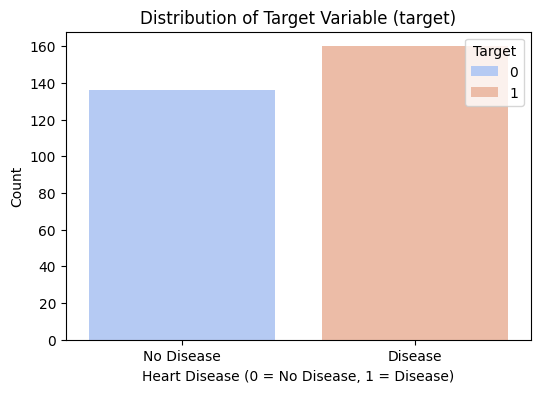

In [123]:
# Distribution of Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=cleaned_data, hue='target', palette='coolwarm', dodge=False)
plt.title('Distribution of Target Variable (target)')
plt.xlabel('Heart Disease (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.legend(title='Target')
plt.show()

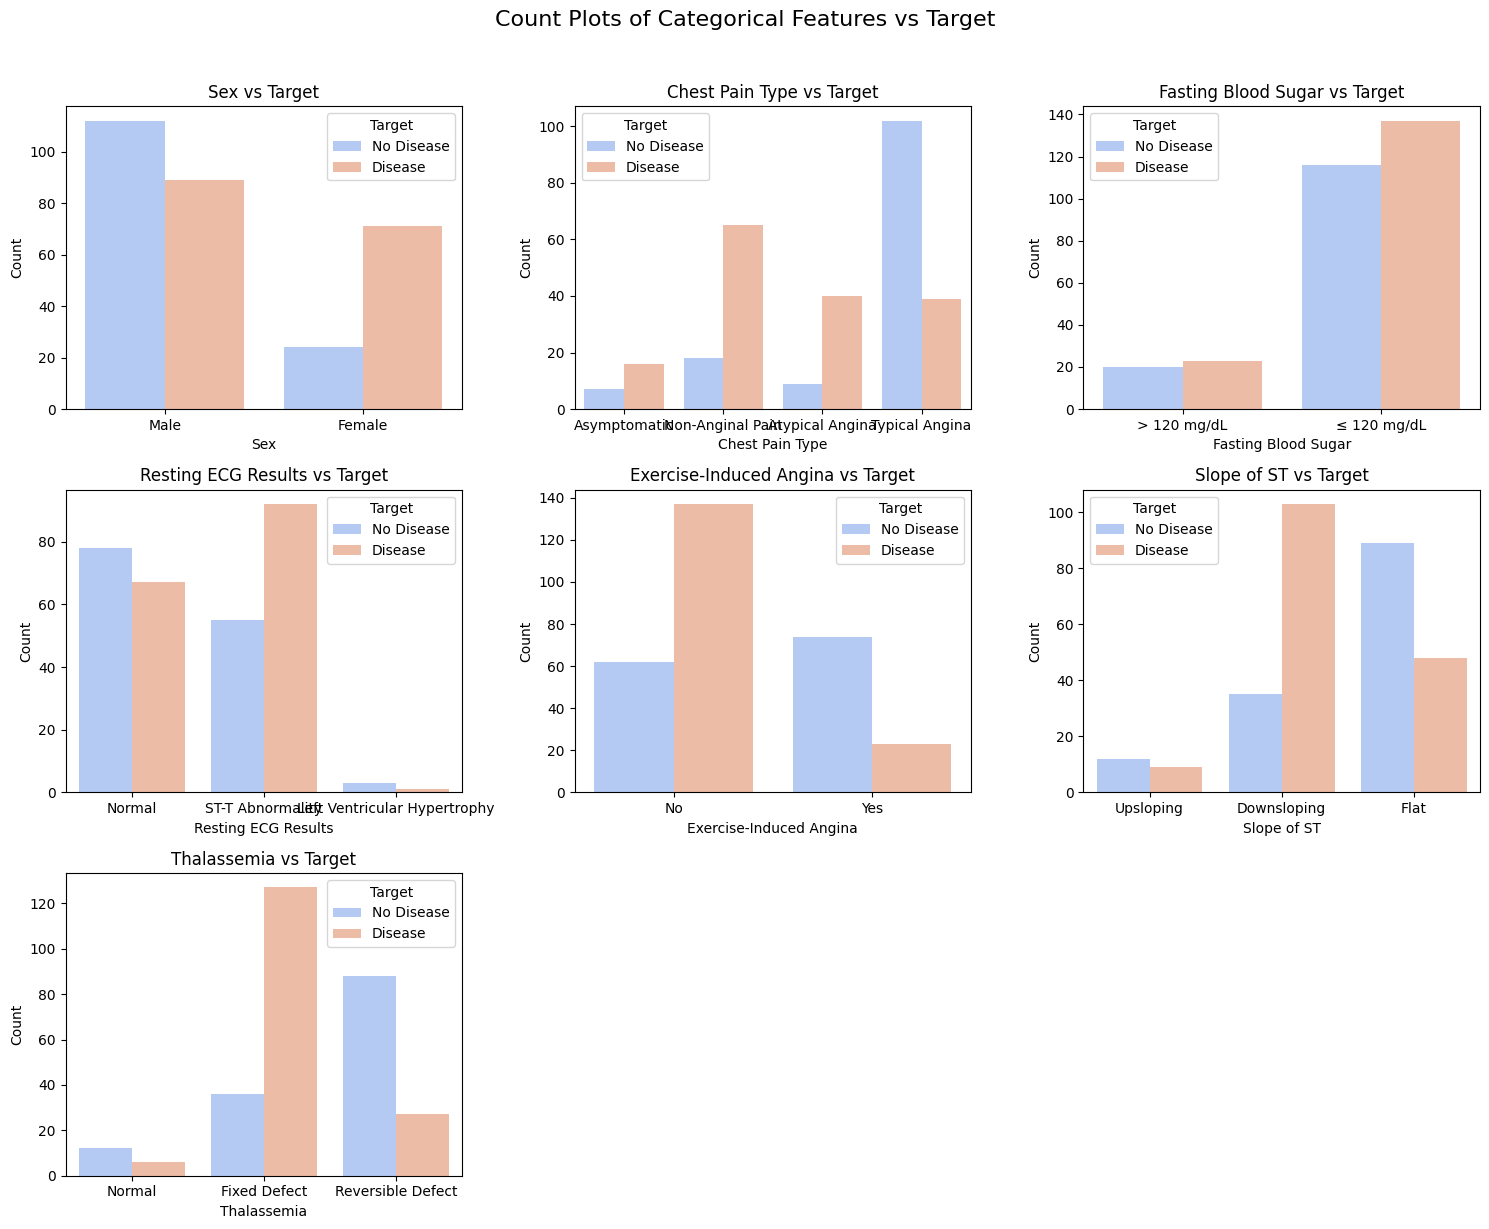

In [179]:
# Exploring Categorical Features
categorical_features = [
    'Sex', 'Chest Pain Type', 'Fasting Blood Sugar',
    'Resting ECG Results', 'Exercise-Induced Angina',
    'Slope of ST', 'Thalassemia'
]

plt.figure(figsize=(15, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, hue='target', data=cleaned_data, palette='coolwarm')
    plt.title(f'{feature} vs Target')
    plt.ylabel('Count')
    plt.xlabel(feature)
    plt.legend(title='Target', labels=['No Disease', 'Disease'])

# Add a title to the entire figure
plt.suptitle("Count Plots of Categorical Features vs Target", fontsize=16, y=1.02)

plt.tight_layout()
plt.show()


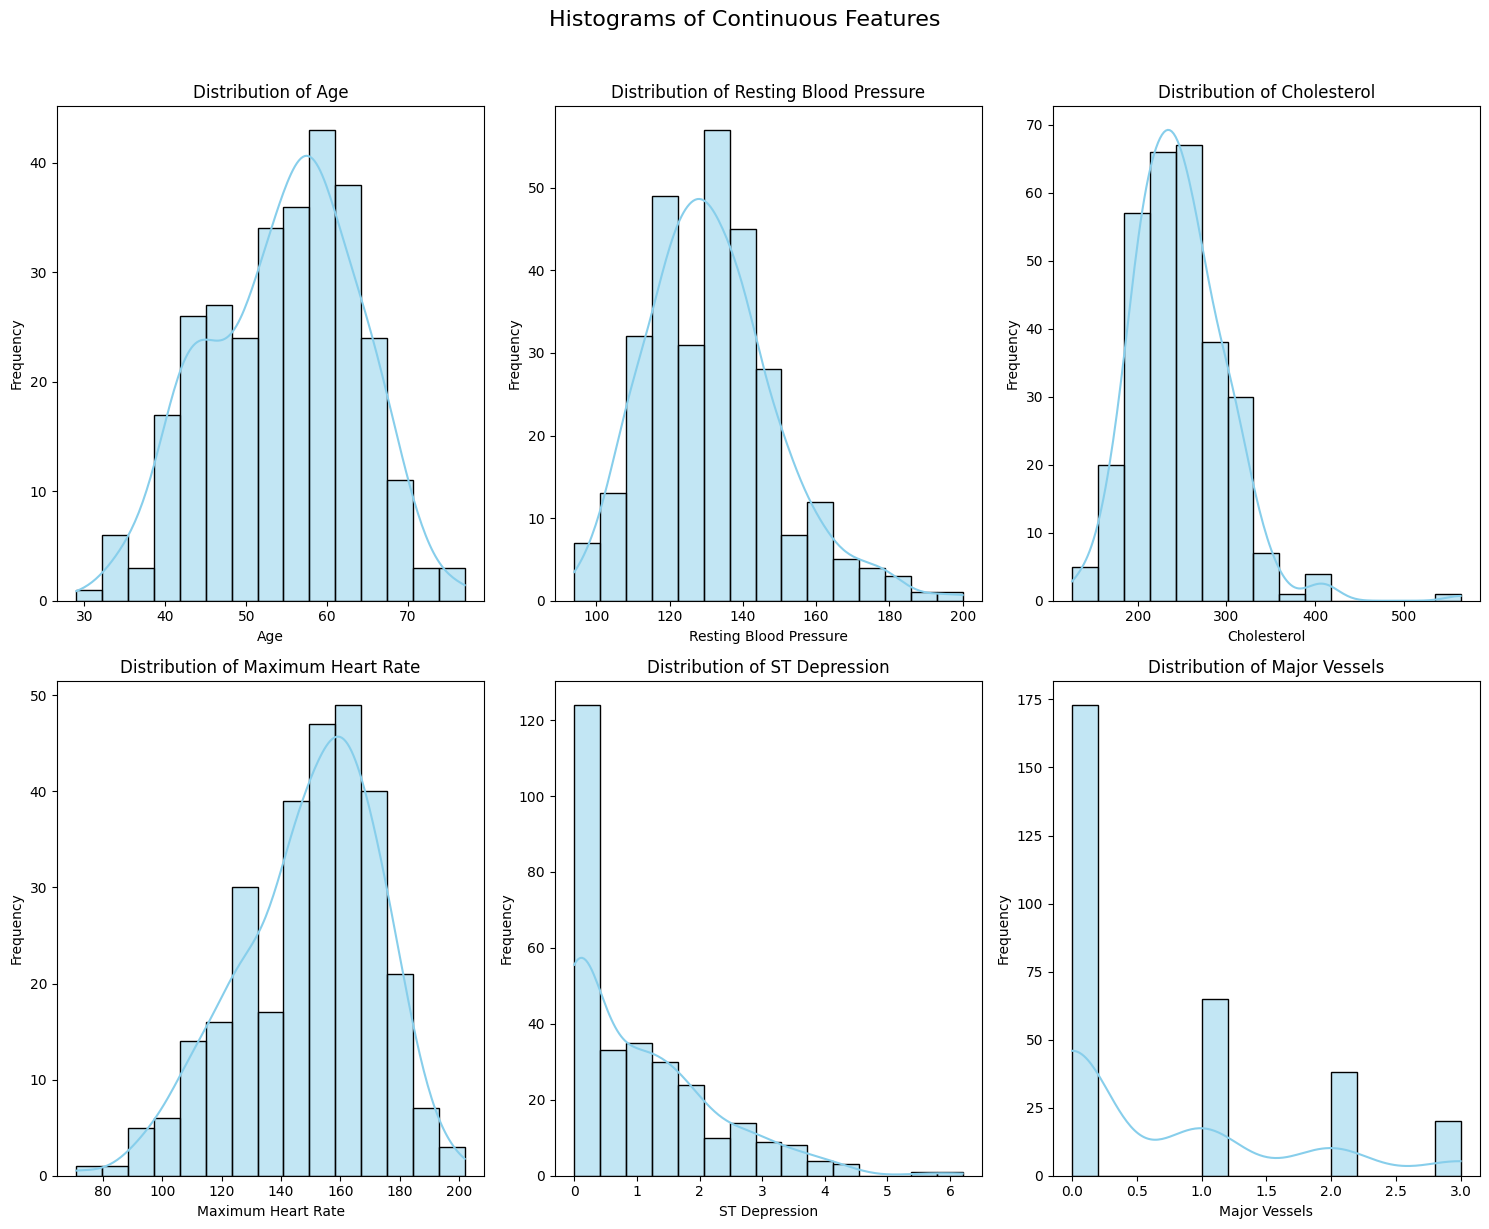

In [178]:
# Exploring Continuous Features
continuous_features = ['Age', 'Resting Blood Pressure', 'Cholesterol', 'Maximum Heart Rate', 'ST Depression', 'Major Vessels']

# Histograms of Continuous Features
plt.figure(figsize=(15, 12))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(cleaned_data[feature], kde=True, color='skyblue', bins=15)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Add a title to the entire figure
plt.suptitle("Histograms of Continuous Features", fontsize=16, y=1.02)

plt.tight_layout()
plt.show()


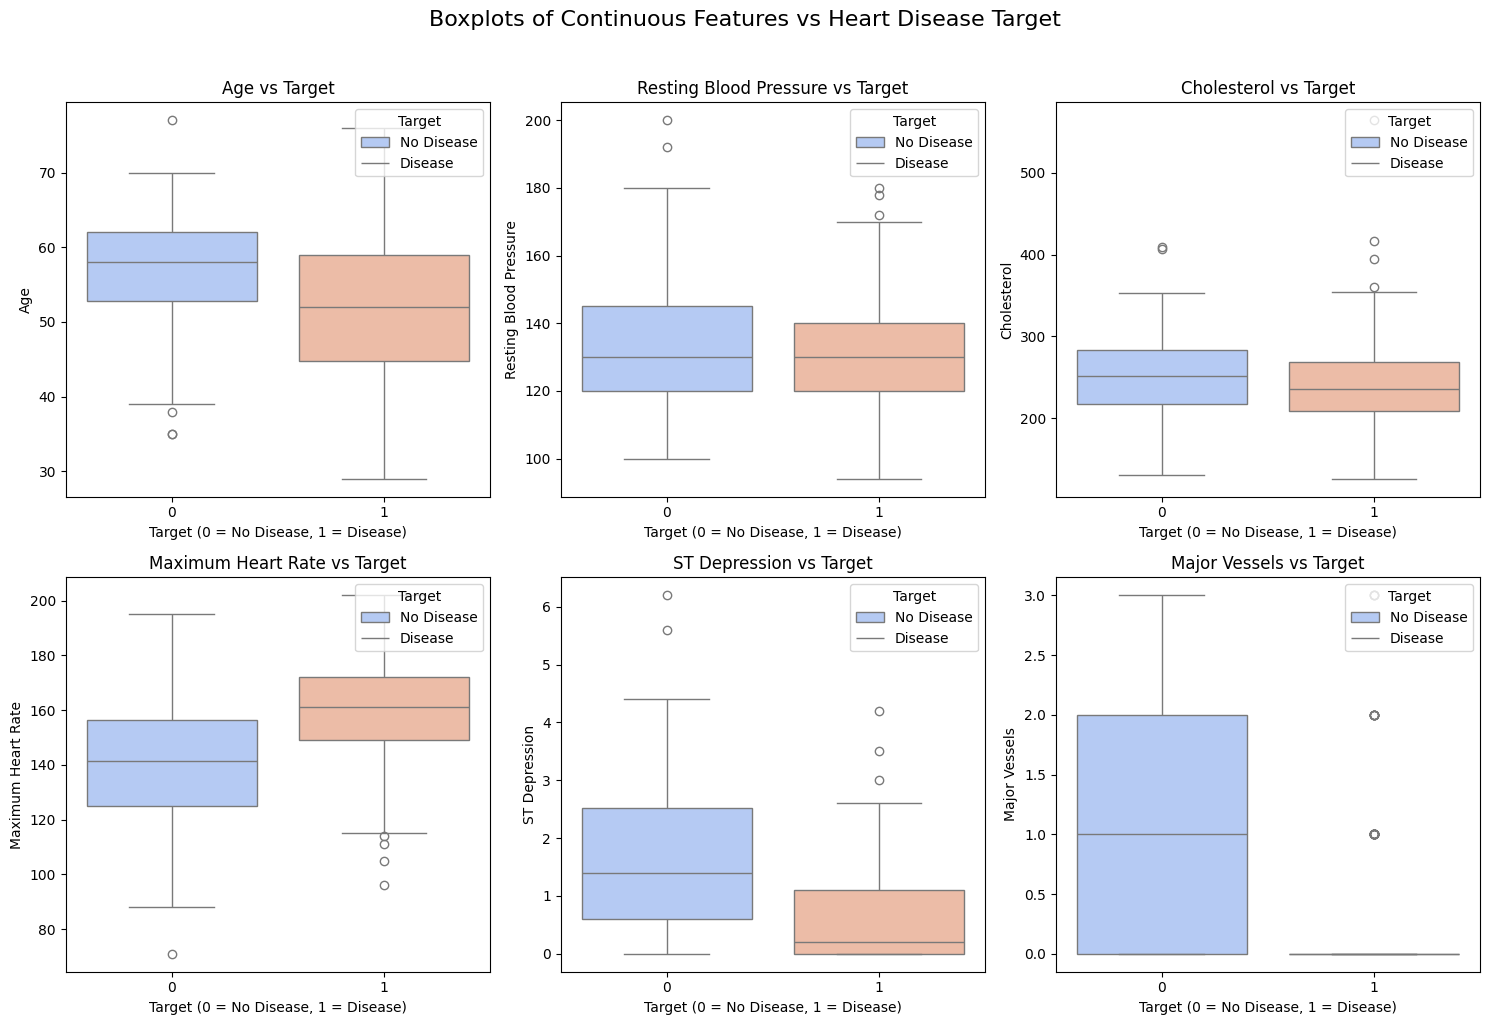

In [177]:
# Boxplots of Continuous Features vs Target
plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='target', y=feature, data=cleaned_data, hue='target', palette='coolwarm', dodge=False)
    plt.title(f'{feature} vs Target')
    plt.xlabel('Target (0 = No Disease, 1 = Disease)')
    plt.ylabel(feature)
    plt.legend(title='Target', labels=['No Disease', 'Disease'], loc='upper right')

# Add a title to the entire figure
plt.suptitle("Boxplots of Continuous Features vs Heart Disease Target", fontsize=16, y=1.02)

plt.tight_layout()
plt.show()


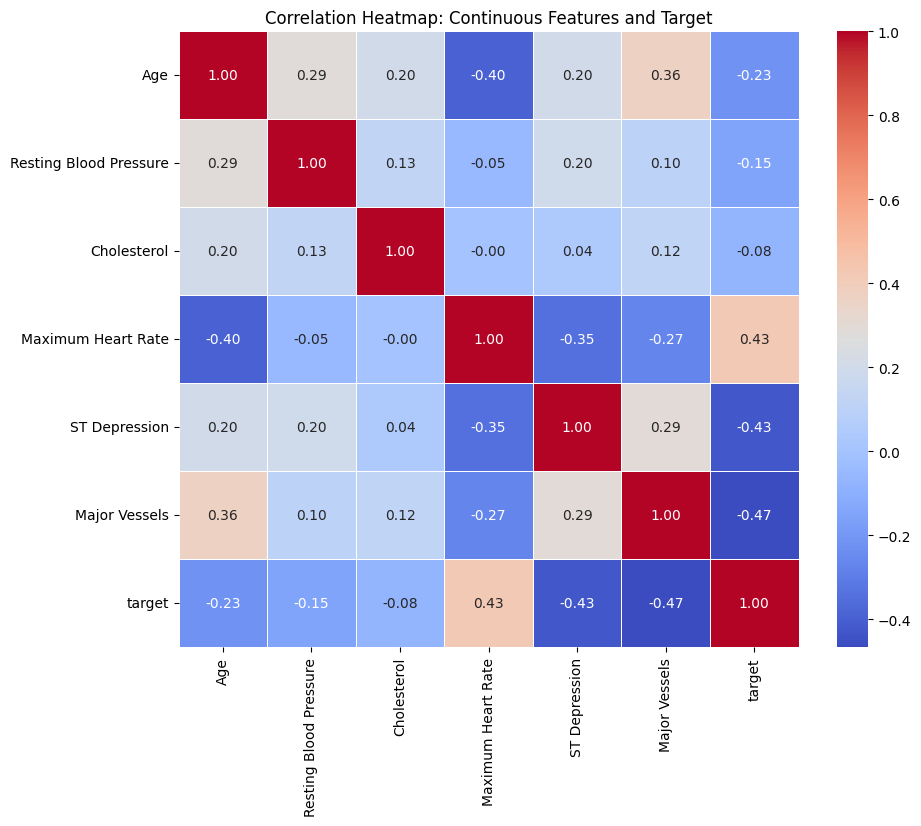

In [127]:
# Correlation Analysis
correlation_matrix = cleaned_data[continuous_features + ['target']].corr()

# Heatmap of Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Continuous Features and Target')
plt.show()

## 2. Modeling & Interpretations

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

In [129]:
# Features and Target
X = cleaned_data.drop(columns=['target'])  # Features
y = cleaned_data['target']  # Target

In [130]:
# Categorical and Numerical Features
categorical_features = [
    'Sex', 'Chest Pain Type', 'Fasting Blood Sugar',
    'Resting ECG Results', 'Exercise-Induced Angina', 'Slope of ST', 'Thalassemia'
]
numerical_features = ['Age', 'Resting Blood Pressure', 'Cholesterol',
                      'Maximum Heart Rate', 'ST Depression', 'Major Vessels']

In [131]:
# Define the preprocessing using make_column_transformer
preprocessor = make_column_transformer(
    (OneHotEncoder(drop='first'), categorical_features),
    remainder=StandardScaler()
)

In [132]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [133]:
# Apply preprocessing to training and testing data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


print(f"Training Data Shape: {X_train_transformed.shape}")
print(f"Testing Data Shape: {X_test_transformed.shape}")

Training Data Shape: (236, 18)
Testing Data Shape: (60, 18)


# Baseline Model

In [135]:
# Initialize Dummy Classifier with "most_frequent" strategy
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)

# Train the Dummy Classifier
dummy_clf.fit(X_train_transformed, y_train)

# Predict using Dummy Classifier
y_pred_dummy = dummy_clf.predict(X_test_transformed)

# Evaluate the Dummy Classifier
print("Classification Report - Dummy Classifier:")
print(classification_report(y_test, y_pred_dummy))
print(f"Accuracy Score - Dummy Classifier: {accuracy_score(y_test, y_pred_dummy):.4f}")

Classification Report - Dummy Classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.53      1.00      0.70        32

    accuracy                           0.53        60
   macro avg       0.27      0.50      0.35        60
weighted avg       0.28      0.53      0.37        60

Accuracy Score - Dummy Classifier: 0.5333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [136]:
# Confusion Matrix for Dummy Classifier
conf_matrix_dummy = confusion_matrix(y_test, y_pred_dummy)
conf_matrix_dummy

array([[ 0, 28],
       [ 0, 32]])

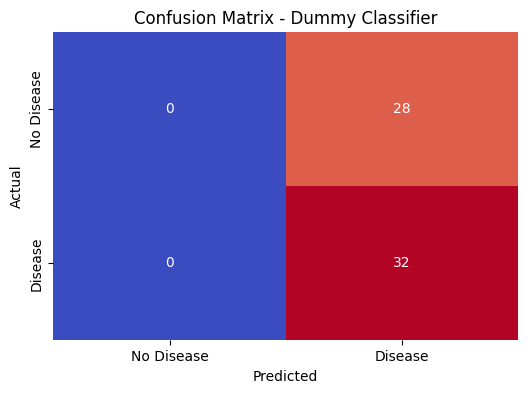

In [137]:
# Plot the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dummy, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'], cbar=False)
plt.title("Confusion Matrix - Dummy Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#  Logistic Regression

In [138]:
# Define the pipeline with preprocessing and Logistic Regression
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))  # Logistic Regression model
])

logreg_pipeline

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'Chest Pain Type',
                                                   'Fasting Blood Sugar',
                                                   'Resting ECG Results',
                                                   'Exercise-Induced Angina',
                                                   'Slope of ST',
                                                   'Thalassemia'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [139]:
# Train the model
logreg_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg_pipeline.predict(X_test)

# Evaluate Logistic Regression Model
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")

# Classification Report
print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8333

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.84      0.84      0.84        32

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



In [140]:
# Confusion Matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
conf_matrix_logreg

array([[23,  5],
       [ 5, 27]])

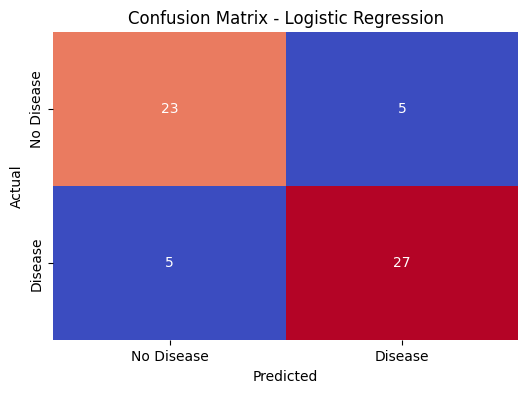

In [141]:
# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'], cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

 # K-Nearest Neighbors (KNN) Model

In [142]:
 # Define the pipeline with preprocessing and KNN
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

knn_pipeline

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'Chest Pain Type',
                                                   'Fasting Blood Sugar',
                                                   'Resting ECG Results',
                                                   'Exercise-Induced Angina',
                                                   'Slope of ST',
                                                   'Thalassemia'])])),
                ('classifier', KNeighborsClassifier())])

In [143]:
# Train the pipeline
knn_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_pipeline.predict(X_test)

# Evaluate KNN Model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy:.4f}")

# Classification Report
print("\nClassification Report - KNN:")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.7500

Classification Report - KNN:
              precision    recall  f1-score   support

           0       0.72      0.75      0.74        28
           1       0.77      0.75      0.76        32

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



In [144]:
# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_knn

array([[21,  7],
       [ 8, 24]])

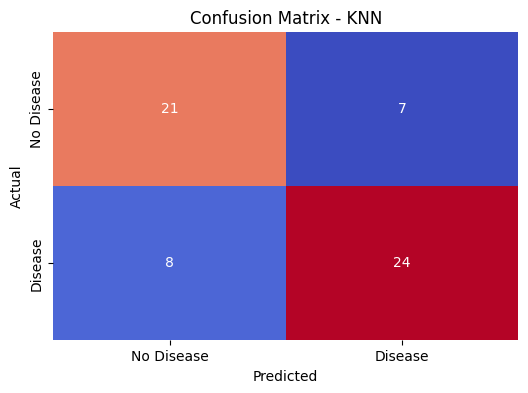

In [145]:
# Plot Confusion Matrix for KNN
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'], cbar=False)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Hyperparameter Tuning for KNN

In [146]:
param_grid = {
    'n_neighbors': range(1, 20),
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search_knn.fit(X_train_transformed, y_train)

# Best parameters and best score
best_k = grid_search_knn.best_params_['n_neighbors']
best_metric = grid_search_knn.best_params_['metric']
best_score = grid_search_knn.best_score_

print(f"Best n_neighbors: {best_k}")
print(f"Best metric: {best_metric}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

y_pred_knn = grid_search_knn.best_estimator_.predict(X_test_transformed)

print("Tuned KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

Fitting 5 folds for each of 38 candidates, totalling 190 fits
Best n_neighbors: 7
Best metric: manhattan
Best cross-validation accuracy: 0.8391
Tuned KNN Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.79      0.84      0.82        32

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



In [147]:
# Confusion Matrix
conf_matrix_best_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_best_knn

array([[21,  7],
       [ 5, 27]])

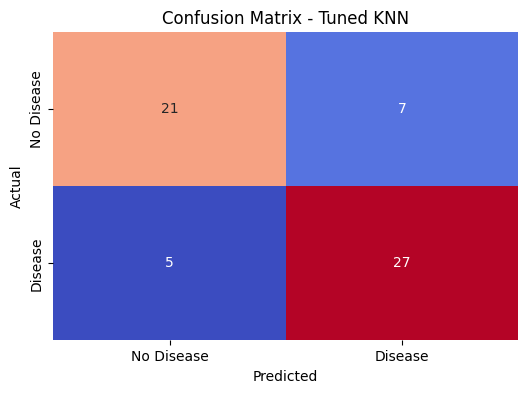

In [148]:
# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best_knn, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'], cbar=False)
plt.title("Confusion Matrix - Tuned KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Decision Tree Model

 ## Baseline Decision Tree

In [150]:
# Initialize the Decision Tree model with default parameters
dtree = DecisionTreeClassifier(random_state=42)


dtree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', dtree)
])

dtree_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'Chest Pain Type',
                                                   'Fasting Blood Sugar',
                                                   'Resting ECG Results',
                                                   'Exercise-Induced Angina',
                                                   'Slope of ST',
                                                   'Thalassemia'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [152]:
# Train the model
dtree_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_dtree = dtree_pipeline.predict(X_test)

# Evaluate the Decision Tree model
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dtree))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.68      0.70        28
           1       0.74      0.78      0.76        32

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.73      0.73      0.73        60



In [153]:
# Confusion Matrix
conf_matrix_dtree = confusion_matrix(y_test, y_pred_dtree)
conf_matrix_dtree

array([[19,  9],
       [ 7, 25]])

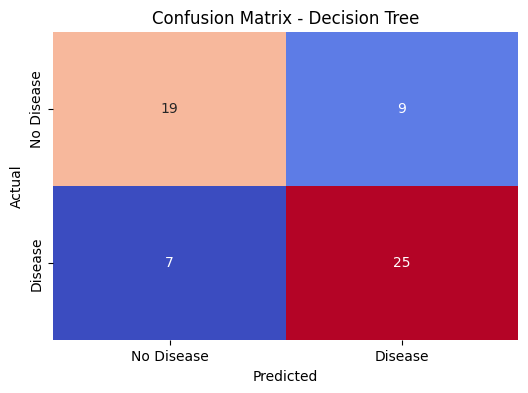

In [154]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dtree, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'], cbar=False)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##  Feature Importance

In [155]:
# Extract and display feature importance
feature_importances = pd.DataFrame({
    'Feature': dtree_pipeline.named_steps['preprocessor'].get_feature_names_out(),
    'Importance': dtree_pipeline.named_steps['classifier'].feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
                                              Feature  Importance
17                           remainder__Major Vessels    0.262583
14                             remainder__Cholesterol    0.163220
11       onehotencoder__Thalassemia_Reversible Defect    0.143124
16                           remainder__ST Depression    0.095967
12                                     remainder__Age    0.085061
3       onehotencoder__Chest Pain Type_Typical Angina    0.084335
15                      remainder__Maximum Heart Rate    0.066997
0                             onehotencoder__Sex_Male    0.032010
7          onehotencoder__Exercise-Induced Angina_Yes    0.017925
8                     onehotencoder__Slope of ST_Flat    0.015281
6   onehotencoder__Resting ECG Results_ST-T Abnorm...    0.014226
13                  remainder__Resting Blood Pressure    0.010166
1      onehotencoder__Chest Pain Type_Atypical Angina    0.009105
10                  onehotencoder__Thalassemia_Normal 

<ipython-input-156-9044490ae8a9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='coolwarm')


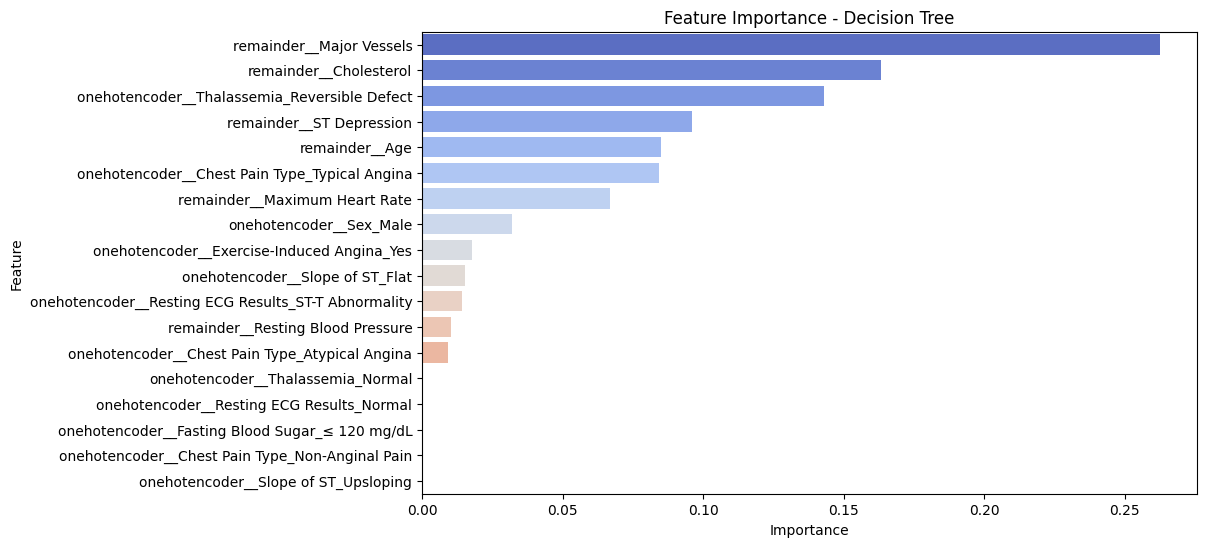

In [156]:
# Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='coolwarm')
plt.title("Feature Importance - Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## Tuned Decision Tree

In [157]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search_dtree = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_dtree.fit(X_train_transformed, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [158]:
# Best parameters and cross-validation score
best_params = grid_search_dtree.best_params_
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {grid_search_dtree.best_score_:.4f}")

# Train the tuned model
best_dtree = grid_search_dtree.best_estimator_

# Predict with the tuned model
y_pred_best_dtree = best_dtree.predict(X_test_transformed)

# Evaluate the tuned model
print("Tuned Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_best_dtree))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_best_dtree):.4f}")

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.7842
Tuned Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        28
           1       0.75      0.84      0.79        32

    accuracy                           0.77        60
   macro avg       0.77      0.76      0.76        60
weighted avg       0.77      0.77      0.76        60

Accuracy Score: 0.7667


In [159]:
conf_matrix_best_dtree = confusion_matrix(y_test, y_pred_best_dtree)
conf_matrix_best_dtree

array([[19,  9],
       [ 5, 27]])

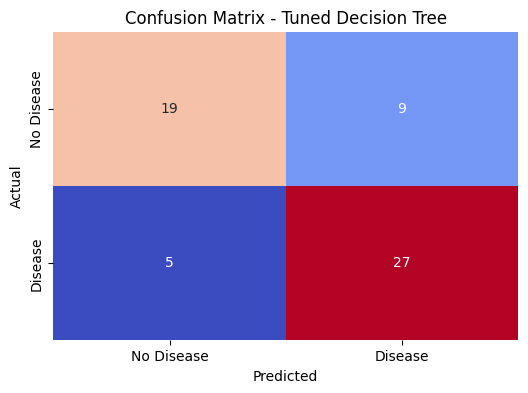

In [160]:
# Confusion Matrix for Tuned Decision Tree
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best_dtree, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'], cbar=False)
plt.title("Confusion Matrix - Tuned Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

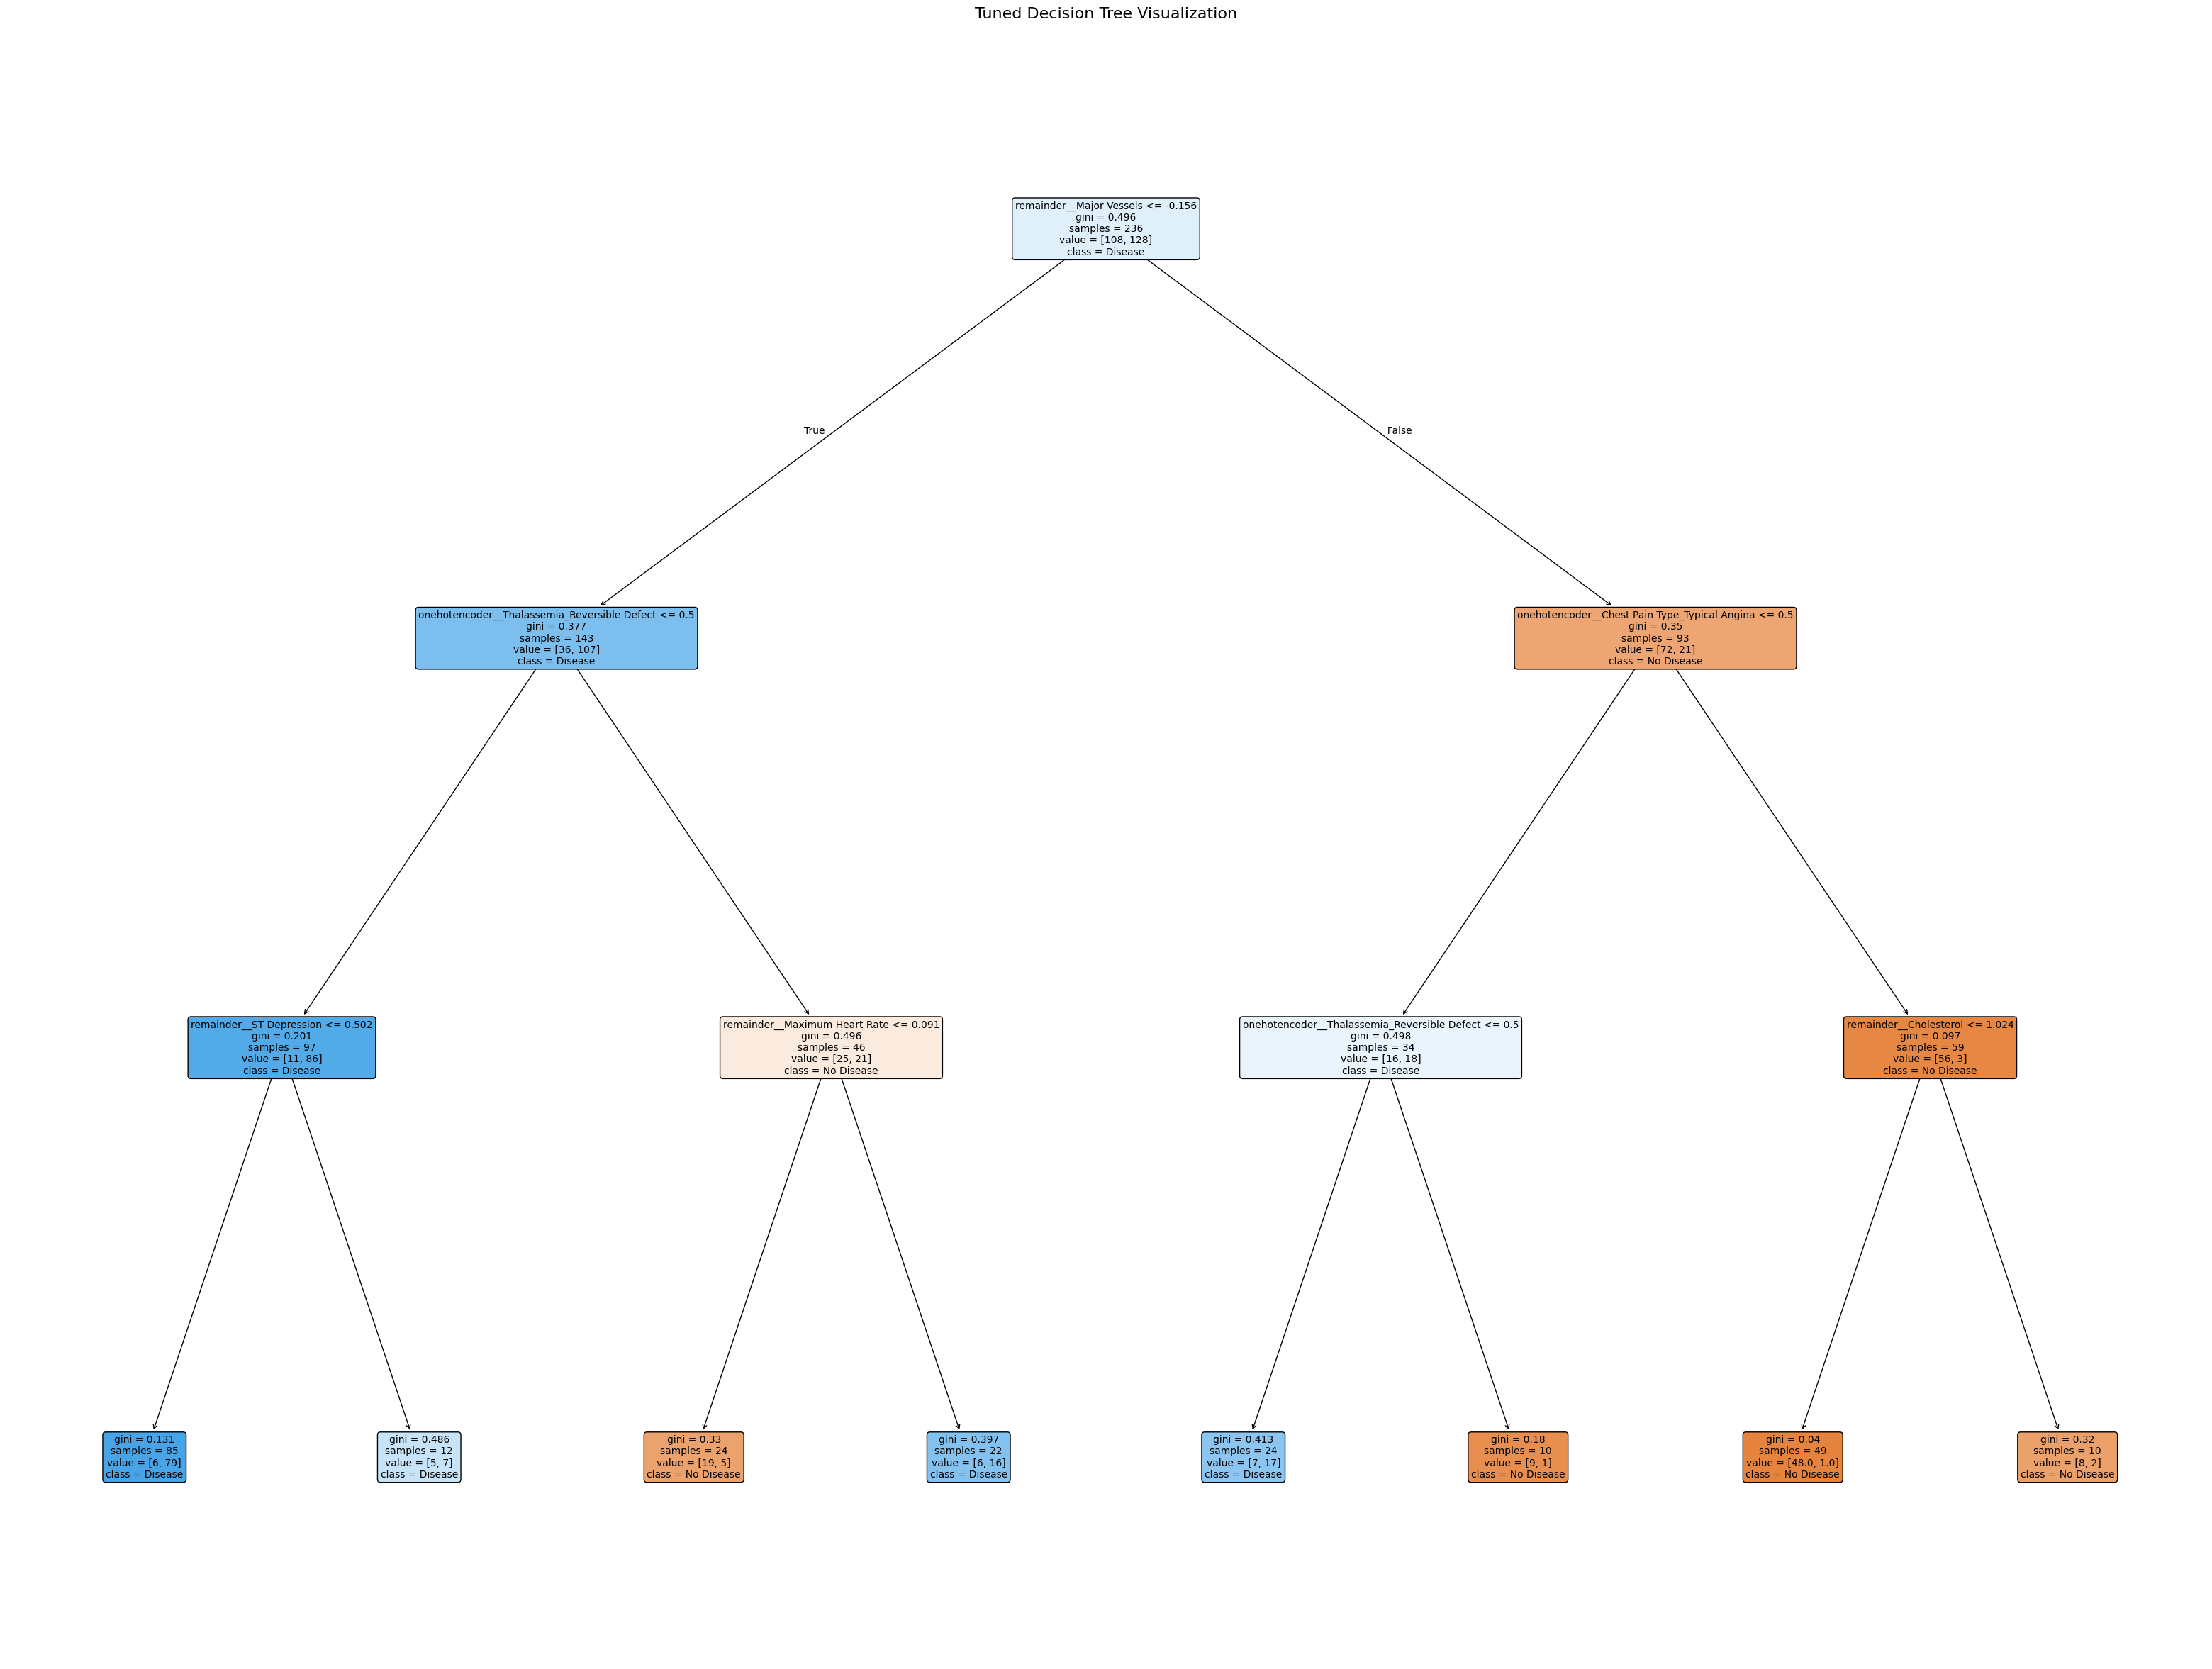

In [161]:
# Visualize the Tuned Decision Tree
plt.figure(figsize=(40, 30))

# Plot the tree
plot_tree(
    best_dtree,
    feature_names=preprocessor.get_feature_names_out(),
    class_names=['No Disease', 'Disease'],
    filled=True,
    fontsize=10,
    rounded=True
)

plt.title("Tuned Decision Tree Visualization", fontsize=16)

plt.show()

### Random Forest Model

In [162]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_transformed, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test_transformed)

# Evaluate Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.84      0.83        32

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.82        60
weighted avg       0.82      0.82      0.82        60

Random Forest Accuracy: 0.8167


In [163]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_rf

array([[22,  6],
       [ 5, 27]])

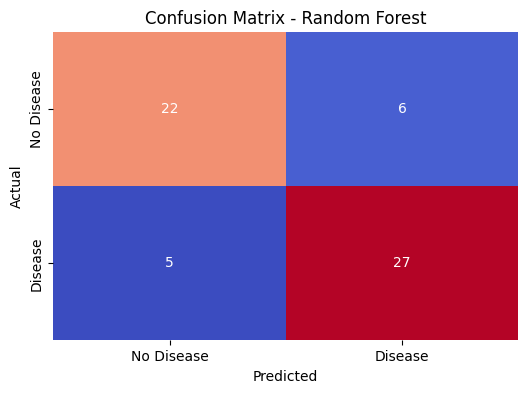

In [164]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'], cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Feature Importance

In [168]:
# Feature Importance
rf_feature_importances = pd.DataFrame({
    'Feature': preprocessor.get_feature_names_out(),
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(rf_feature_importances)


Feature Importances:
                                              Feature  Importance
17                           remainder__Major Vessels    0.139808
15                      remainder__Maximum Heart Rate    0.121317
16                           remainder__ST Depression    0.115858
11       onehotencoder__Thalassemia_Reversible Defect    0.113270
3       onehotencoder__Chest Pain Type_Typical Angina    0.087296
12                                     remainder__Age    0.082926
14                             remainder__Cholesterol    0.070908
13                  remainder__Resting Blood Pressure    0.066660
7          onehotencoder__Exercise-Induced Angina_Yes    0.058165
0                             onehotencoder__Sex_Male    0.035961
8                     onehotencoder__Slope of ST_Flat    0.027966
2     onehotencoder__Chest Pain Type_Non-Anginal Pain    0.018068
6   onehotencoder__Resting ECG Results_ST-T Abnorm...    0.015216
5           onehotencoder__Resting ECG Results_Normal 

<ipython-input-167-fbaef4dc0f23>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_feature_importances, x='Importance', y='Feature', palette='coolwarm')


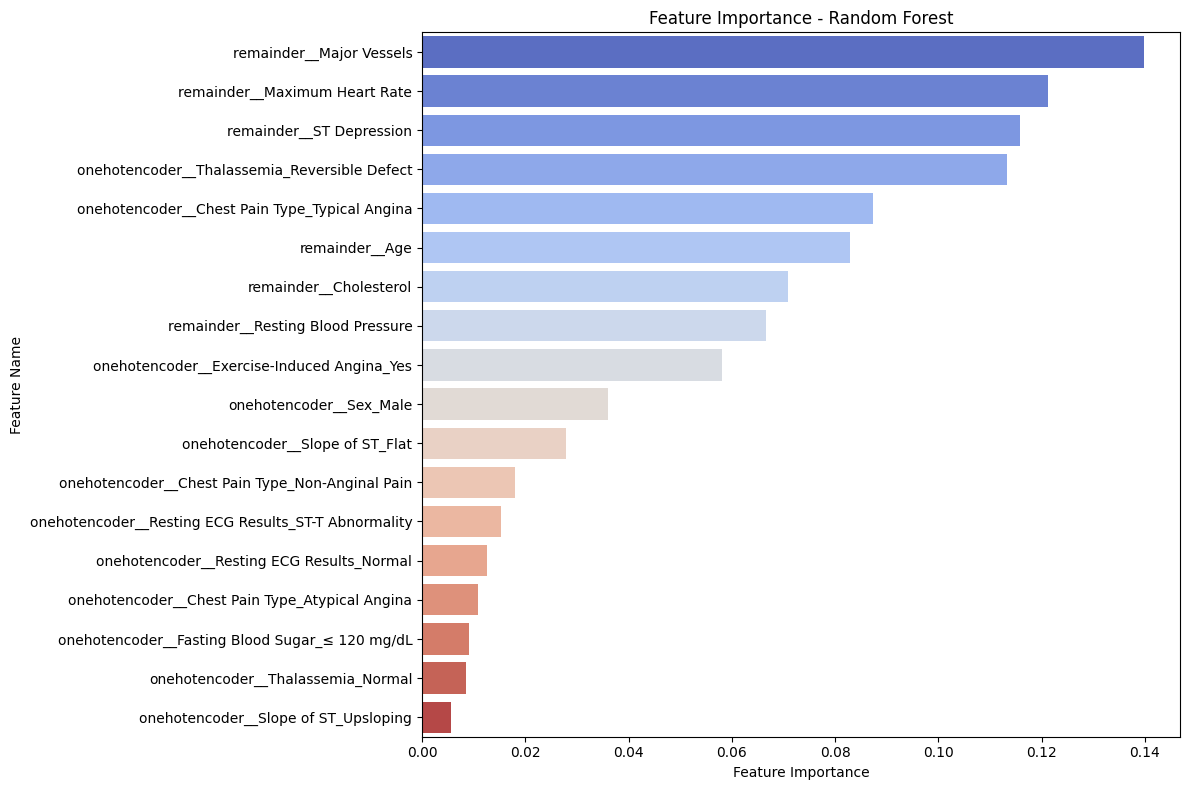

In [167]:
# Plot Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(data=rf_feature_importances, x='Importance', y='Feature', palette='coolwarm')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

## Hyperparameter Tuning for Random Forest

In [169]:
# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [170]:
# Fit the grid search to the training data
grid_search_rf.fit(X_train_transformed, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [172]:
# Best parameters and cross-validation accuracy
best_params_rf = grid_search_rf.best_params_
best_cv_score_rf = grid_search_rf.best_score_
print(f"Best Parameters: {best_params_rf}")
print(f"Best Cross-Validation Accuracy: {best_cv_score_rf:.4f}")


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.8644


In [173]:
# Train the tuned Random Forest model
best_rf_model = grid_search_rf.best_estimator_

# Predict with the tuned model
y_pred_best_rf = best_rf_model.predict(X_test_transformed)

In [174]:
# Evaluate the tuned model
print("Tuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best_rf))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_best_rf):.4f}")

Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.77      0.84      0.81        32

    accuracy                           0.78        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60

Accuracy Score: 0.7833


In [175]:
# Confusion Matrix
conf_matrix_rf_tuned = confusion_matrix(y_test,y_pred_best_rf)
conf_matrix_rf_tuned

array([[20,  8],
       [ 5, 27]])

# Final Model Selection

In [176]:
# Model performance data
model_comparison = {
    "Model": [
        "Baseline Dummy Model",
        "Logistic Regression",
        "Tuned KNN",
        "Tuned Decision Tree",
        "Default Random Forest",
        "Tuned Random Forest"
    ],
    "Recall": [1.00, 0.84, 0.84, 0.84, 0.84, 0.84],
    "Precision": [0.53, 0.84, 0.79, 0.75, 0.82, 0.77],
    "F1-Score": [0.70, 0.84, 0.82, 0.79, 0.83, 0.81],
    "Accuracy": [0.53, 0.83, 0.80, 0.77, 0.82, 0.78]
}

# Create a DataFrame
df_comparison = pd.DataFrame(model_comparison)
df_comparison

,Model,Recall,Precision,F1-Score,Accuracy
0,Baseline Dummy Model,1.00,0.53,0.70,0.53
1,Logistic Regression,0.84,0.84,0.84,0.83
2,Tuned KNN,0.84,0.79,0.82,0.80
3,Tuned Decision Tree,0.84,0.75,0.79,0.77
4,Default Random Forest,0.84,0.82,0.83,0.82
5,Tuned Random Forest,0.84,0.77,0.81,0.78
